# El método de Newton para intervalos

In [100]:
using PyPlot

In [1]:
using Intervals
using FactCheck
using Derivatives
using DerivativesTest
using IntervalsTest

    ^(Derive,Real) at /home/estudiante/MetodosNumericosAvanzados/Tareas/Derivatives.jl:93
is ambiguous with: 
    ^(Any,Integer) at intfuncs.jl:86.
To fix, define 
    ^(Derive,Integer)
before the new definition.


Prueba básicas de derivación:
10 facts verified.
Prueba básicas de Intervalos:
Solo se utilizó la parte no negativa del intervalo
26 facts verified.


Igual que en la clase anterior, supondremos que $f(x)$ es una función continuamente diferenciable y que existe un valor $x^*$ donde $f(x^*)=0$ (es decir, $x^*$ es una raíz de $f$). Aquí abordaremos de nuevo cómo encontrar las raíces de $f$ dentro de un intervalo inicial $X$. Supondremos además que existe una extensión del intervalo $F'$ para la derivada $f'$, y que (por el momento) éste no contiene al cero: $0\notin F'(X)$.

La clave del método de Newton para intervalos está en aplicar el *teorema del valor medio*, que nos asegura que para cualquier $x\in X$ se cumple que

\begin{equation}
f(x) = f(x^*) + f'(\xi) \cdot (x-x^*),
\end{equation}

para algúna $\xi$ entre $x$ y $x^*$. Aquí, $\xi$ es un valor desconocido, pero podemos utilizar el hecho de que está contenido en el intervalo: $\xi \in X$.

Por lo tanto, obtenemos 

\begin{equation}
x^* = x - \frac{f(x)}{f'(\xi)} \in x - \frac{f(x)}{F'(X)} =: N(X,x),
\end{equation}
donde hemos definido un operador $N$ que actúa sobre un intervalo y *cualquier* punto en el intervalo.

Si suponemos que $x^*\in X$, entonces $x^* \in N(X,x)\cap X$ para toda $x\in X$.

Una elección particular es $x = m := \mathrm{mid}(X)$, el punto medio del intervalo $X$. Entonces obtenemos el llamado *operador de Newton para intervalos*:

\begin{equation}
N(X) := N(X,m) = m - \frac{f(m)}{F'(X)}.
\end{equation}

Nota que cuando implementamos esto en la computadora, en general $f(m)$ no se podrá calcular exactamente, por lo cual es necesario convertir $m$ en un intervalo $M := [m,m]$, y usar la extensión natural $F(M)$, así que tenemos finalmente 

\begin{equation}
N(X) := M - \frac{F(M)}{F'(X)},
\end{equation}
donde ahora todos son intervalos.

Ahora podemos definir una sucesión de intervalos a partir de un intervalo inicial $X_0$, dada por $X_{k+1} := X_k \cap N(X_k)$. Por construcción, si $x^*\in X_0$ entonces $x^*\in X_k$ para toda $k$. Entonces, si $X_0$ contiene a una raíz, la raíz se mantiene dentro de la secuencia de intervalos, que de hecho forman una secuencia anidada que converge a $x^*$. Entonces, si controlamos que de alguna manera el diámetro de los intervalos $x_k$ disminuya, obtendremos cotas precisas para $x^*$. Esto es el contenido del **Teorema del método de Newton para intervalos**.

Más aún, si $f(x)$ es doblemente continua y diferenciable y $N(X)$ está bien definida en el intervalo $X$, se puede demostrar que 

1. Si $N(X)\cap X = \emptyset$, es decir, $N(X)$ no se intersecta con $X$, entonces $X$ no contiene ninguna raíz de $f$.

2. Si $N(X) \subseteq X$, entonces $X$ contiene exactamente una raíz de $f$.



[1] Escribe una función que calcule el operador de Newton para un intervalo $X$, dadas $f(x)$ y $f'(x)$.

[2] Implementa el método de Newton para intervalos para encontrar las raíces de $f(x) = x^3 - 1$ a partir de $X=[-3,3]$. Muestra gráficamente la implementación del método. En cada iteración subsecuente del método, ilustra qué le pasa al diámetro de la refincación del intervalo que vas obteniendo.


Implemento la división extendida desde el inicio para poder trabajar con los intervalos proporcionados en el problema.

In [21]:
function remake_newton_interval(X::Interval, Y)
   
    temp=Interval[]
    
    for i=1:length(Y)
        push!(temp,extended_division(df,X))
    end
    
    return(temp)
    
end

remake_newton_interval (generic function with 2 methods)

In [146]:
f(x) = (x-1)*(x-2)*(x-3)




function NewtonIntervalMethod(F::Function,X::Interval,tol)

end

NewtonIntervalMethod(f,Interval(-4,4),1e-15)

X => Interval(-4.0,4.0)
j => 1
Y => [Interval(-Inf,-0.01694915254237288),Interval(0.009900990099009901,Inf)]


LoadError: `-` has no method matching -(::Interval, ::Array{Interval,1})
while loading In[146], in expression starting on line 61

[3] Usando tu implementación, *demuestra* que en el mismo intervalo $X=[-3,3]$ que $g(x) = x^2+1$ no tiene ninguna raíz. Ilustra gráficamente esto.

Hint: En el caso en que $0\in F'(x)$ las hipótesis del teorema no se cumplen. En ese caso hay que dividir el intervalo (bisección por ejemplo) y tratar de que las hipótesis del teorema se cumplan, para poder aplicarlo. Extiende tus funciones para que incluyan esta situación. En ese caso, cada subdivisión debe ser probada si puede o no tener una raíz.

In [54]:
f(x) = x^2-4

NewtonIntervalMethod(f,Interval(-3,3),1e-15)

2-element Array{Interval,1}:
 Interval(-2.0,-2.0)
 Interval(2.0,2.0)  

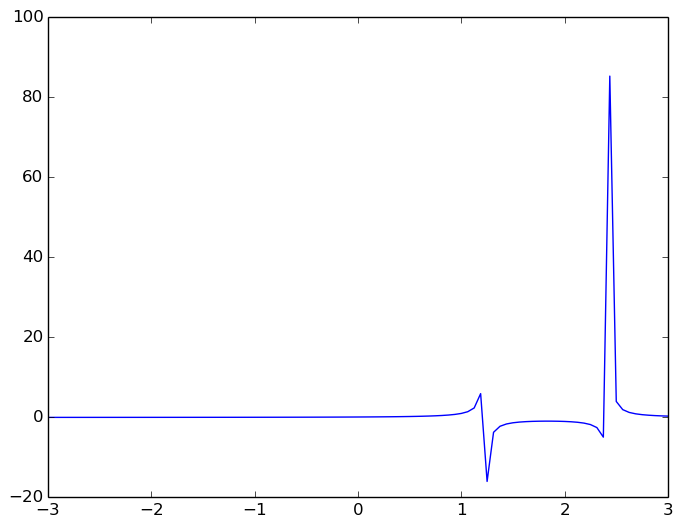

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0d7f496610>

In [134]:
x = -3:.0625:3
ff=[wilkinson(i,3) for i in x]
dff=[wilkinson(makex(i),3).d for i in x]
w=1./dff

plot(x,w)


In [147]:
w

97-element Array{Any,1}:
  0.0144928
  0.0148811
  0.0152854
  0.0157065
  0.0161453
  0.0166029
  0.0170803
  0.0175788
  0.0180995
  0.0186439
  0.0192134
  0.0198096
  0.0204342
  ⋮        
 -2.53465  
 -4.92308  
 85.3333   
  4.0      
  1.9542   
  1.2549   
  0.904594 
  0.695652 
  0.557734 
  0.460432 
  0.388467 
  0.333333 

La función nunca es cero, el mínimo es 1.

In [107]:
dff

25-element Array{Union(Derive,Int64),1}:
 Derive(-120.0,69.0)        
 Derive(-102.421875,61.9375)
 Derive(-86.625,55.25)      
 Derive(-72.515625,48.9375) 
 Derive(-60.0,43.0)         
 Derive(-48.984375,37.4375) 
 Derive(-39.375,32.25)      
 Derive(-31.078125,27.4375) 
 Derive(-24.0,23.0)         
 Derive(-18.046875,18.9375) 
 Derive(-13.125,15.25)      
 Derive(-9.140625,11.9375)  
 Derive(-6.0,9.0)           
 Derive(-3.609375,6.4375)   
 Derive(-1.875,4.25)        
 Derive(-0.703125,2.4375)   
 Derive(0.0,1.0)            
 Derive(0.328125,-0.0625)   
 Derive(0.375,-0.75)        
 Derive(0.234375,-1.0625)   
 Derive(-0.0,-1.0)          
 Derive(-0.234375,-0.5625)  
 Derive(-0.375,0.25)        
 Derive(-0.328125,1.4375)   
 Derive(0.0,3.0)            

In [149]:
g(x) = wilkinson(x,3)
dg(x) = wilkinson(makex(x),3).d
A=Interval(-4,4)

function extended_division(X::Interval,Y::Interval)
    
    a=X.a
    b=X.b
    c=Y.a
    d=Y.b
    
    if (c==0 && d>0)
        return([Interval(1/d,Inf)])
    end
    
    if (d==0 && d<0)
        return([Interval(1/c,Inf)])
    end
    
    if (c < 0 && d > 0)
        return([Interval(1/c,-Inf),Interval(1/d,Inf)])
    end
        
    
end

extended_division(Interval(1,-1),Interval(1,-1))





2-element Array{Interval,1}:
 Interval(-Inf,-1.0)
 Interval(1.0,Inf)  

[4] Considera la familia de polinomios de Wilkinson definidos por $W_n(x) = \prod_{i=1}^n(x-i)$. Partiendo de un intervalo simétrico alrededor de cero, implementa el método de Newton para encontrar sus raíces, utilizando diferenciación automática.

In [101]:
function wilkinson(x,n)
    
    w=1
    
    for i = 1:n
        w=w*(x-i)
    end
    
    return(w)
end


wilkinson (generic function with 1 method)

In [61]:
for i=1:10
    for j=1:10
        print(j)
        if j==5
            break
        end
    end
end

12345123451234512345123451234512345123451234512345

Por el momento el código solo encuentra raíces pares para los polinomios de wilkinson. No logro refinarlo para que funcione mejor.

## División extendida 

Hasta ahora, sólo hemos podido tratar el caso en el cual la derivada $F'(X)$ no contiene $0$. Sin embargo, resulta que es posible tratar también este caso, mediante "división extendida".

[5] Supón que $F'(X)$ sea un intervalo, digamos $F'(X) = [-a, b]$, que contiene $0$ (con $a, b > 0$). 

(i) Definiendo $1/A$ como el conjunto $\{1/x: x \in A \}$, evalúa $1/F'(X)$. 

(ii) Define una función que implementa esta "división extendida" de intervalos (o, más bien, inversa extendida).

[6] Resulta que el método de Newton sigue funcionando si utilizamos esta división extendida cuándo sea apropiado. Impleméntalo para encontrar *todas* las raíces de una función en un intervalo dado.

Nota que hay casos en los cuales no ocurre ninguna de las posibilidades (1) ni (2) en el teorema del método de Newton para intervalos. ¿Qué se puede hacer en este caso?

[7] Implementa pruebas (tests) para tu código.